In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [3]:
# Standard example 
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import CNN
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 1, 32) 
Shape of train set: (22462, 1, 32) 
Shape of validation set: (3964, 1, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.939, loss_val=1.918, train=41.8%, val=42.7%
End of epoch 3:loss_tr=1.197, loss_val=1.196, train=49.3%, val=49.4%
End of epoch 5:loss_tr=1.040, loss_val=1.054, train=57.3%, val=56.5%
End of epoch 7:loss_tr=0.950, loss_val=0.955, train=60.8%, val=60.8%
End of epoch 9:loss_tr=0.893, loss_val=0.900, train=63.1%, val=62.7%
End of epoch 11:loss_tr=0.841, loss_val=0.850, train=65.6%, val=65.5%
End of epoch 13:loss_tr=0.819, loss_val=0.819, train=66.4%, val=67.1%
End of epoch 15:loss_tr=0.769, loss_val=0.787, train=69.6%, val=69.1%
End of epoch 17:loss_tr=0.753, loss_val=0.772, train=69.5%, val=68.7%
End of epoch 19:loss_tr=0.740, loss_val=0.761, train=70.7%, val=69.1%
End of epoch 21:loss_tr=0.704, loss_val=0.728, train=72.1%, val=71.4%
End of epoch 23:loss_tr=0.691, loss_val=0.716, train=72.1%, val=70.9%
End of epoch 25:loss_tr=0.687, loss_val=0.708, train=72.8%, val=72.1%
End of epoch 27:loss_tr=0.671, loss_val=0.698, train=73.4%, val=73.0%
End of epoch 29:loss_tr=0

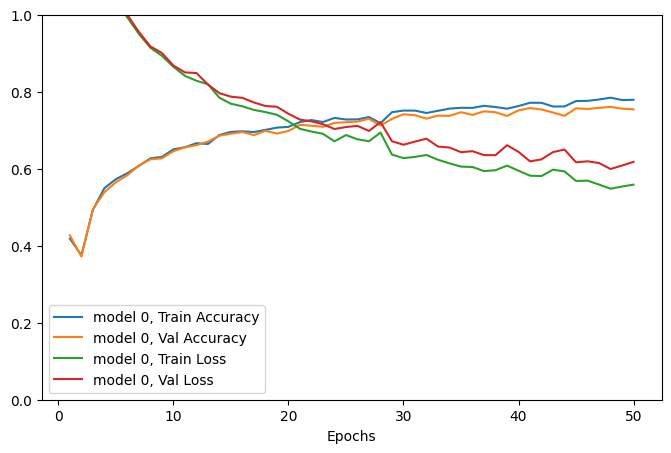

In [2]:
models = [CNN(input_ch=1, n_filters=8, n_hidden=128, out_size=5)]
trainers = [Trainer(D)]
for model, T in zip(models, trainers):
    T.setup(model, max_epochs=50, batch_size=5000)
    T.train_model(model)
plot_train(trainers)
test_accuracy([D, D], models)

In [1]:
# Look at 3 channels
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import CNN 
from peratouch.config import datapath_five_users
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations(aug_factor=1)
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 3, 32) 
Shape of train set: (22462, 3, 32) 
Shape of validation set: (3964, 3, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.539, loss_val=1.541, train=49.9%, val=50.2%
End of epoch 3:loss_tr=0.828, loss_val=0.858, train=67.5%, val=65.6%
End of epoch 5:loss_tr=0.660, loss_val=0.694, train=73.9%, val=72.2%
End of epoch 7:loss_tr=0.569, loss_val=0.616, train=78.0%, val=75.7%
End of epoch 9:loss_tr=0.514, loss_val=0.567, train=79.9%, val=77.3%
End of epoch 11:loss_tr=0.472, loss_val=0.526, train=82.1%, val=79.4%
End of epoch 13:loss_tr=0.434, loss_val=0.497, train=83.6%, val=80.6%
End of epoch 15:loss_tr=0.410, loss_val=0.473, train=84.4%, val=81.5%
End of epoch 17:loss_tr=0.389, loss_val=0.464, train=85.2%, val=82.0%
End of epoch 19:loss_tr=0.369, loss_val=0.451, train=85.9%, val=82.6%
End of epoch 21:loss_tr=0.359, loss_val=0.446, train=86.3%, val=82.6%
End of epoch 23:loss_tr=0.330, loss_val=0.418, train=87.5%, val=84.1%
End of epoch 25:loss_tr=0.312, loss_val=0.401, train=88.1%, val=84.6%
End of epoch 27:loss_tr=0.320, loss_val=0.411, train=87.8%, val=84.4%
End of epoch 29:loss_tr=0

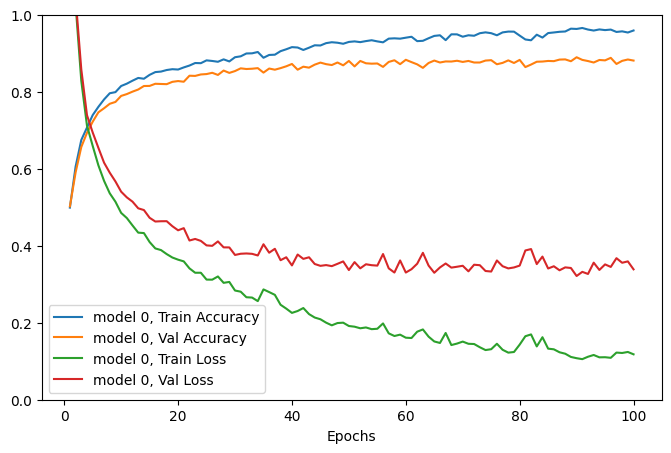

In [2]:
# Did not see any improvement by trying out CNN_Dense
model = CNN(input_ch=3, n_filters=16, n_hidden=256, out_size=5) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=100, batch_size=5000)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])

In [1]:
# TODO: To look at some simple transforms, set transforms=True
# TODO: Look at longer windows of data, maybe width=64